In [1]:
import numpy as np
import pandas as pd 
import os
!pip install tweepy
import tweepy as tw


import re   
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s.sriaravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('./Reddit_Data.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [4]:
df.dropna(axis=0, inplace=True)


In [5]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
# Output first five rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive


### Visualizing

<AxesSubplot:xlabel='category'>

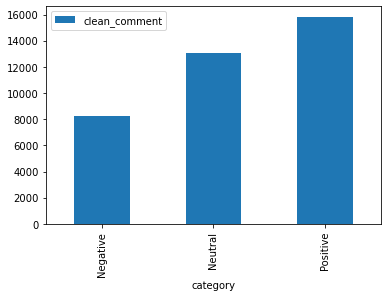

In [6]:
df.groupby('category').count().plot(kind='bar')

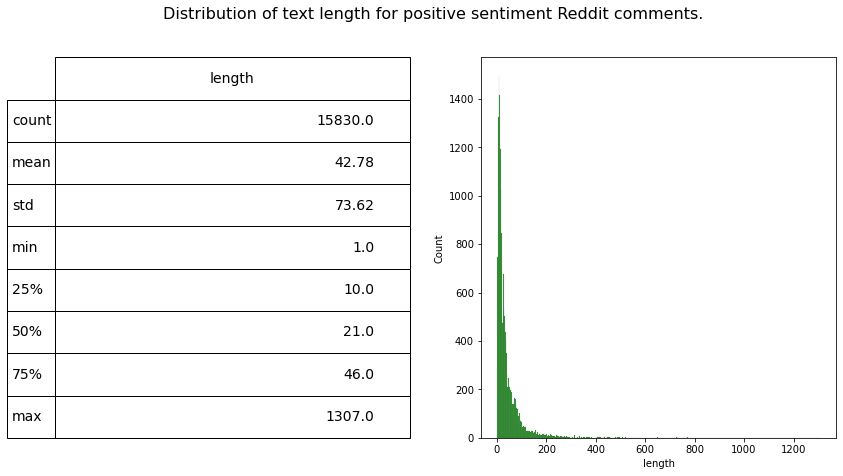

In [8]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment Reddit comments.', fontsize=16)

plt.show()

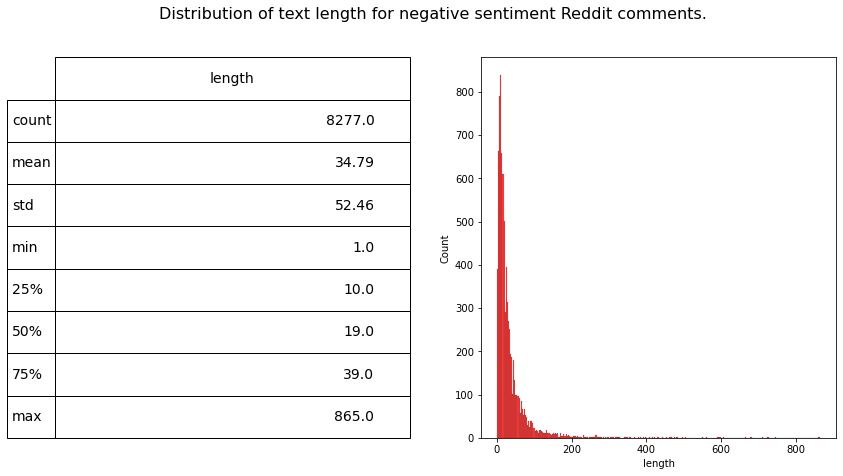

In [9]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment Reddit comments.', fontsize=16)

plt.show()

## Data Pre processing

In [12]:
def comment_to_words(comment):
    

    text = comment.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
   
    words = text.split()
   
    words = [w for w in words if w not in stopwords.words("english")]
    
    words = [PorterStemmer().stem(w) for w in words]
 
    return words

print("\nOriginal commment ->", df['clean_comment'][0])
print("\nProcessed comment ->", comment_to_words(df['clean_comment'][0]))


Original commment ->  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 

Processed comment -> ['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']


In [13]:
X = list(map(comment_to_words, df['clean_comment']))

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [15]:
print(X[0])
print(Y[0])

['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']
2


## Test and Train Split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Number of comments in the total set : {}'.format(len(X)))
print('Number of comments in the training set : {}'.format(len(X_train)))
print('Number of comments in the testing set : {}'.format(len(X_test)))


Number of comments in the total set : 37149
Number of comments in the training set : 29719
Number of comments in the testing set : 7430


## Bag of words Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


vocabulary_size = 5000


count_vector = CountVectorizer(max_features=vocabulary_size,preprocessor=lambda x: x,tokenizer=lambda x: x) 



X_train = count_vector.fit_transform(X_train).toarray()


X_test = count_vector.transform(X_test).toarray()

In [20]:
print(count_vector.get_feature_names()[0:200])

['000', '100', '1000', '101', '10k', '10th', '120', '150', '16', '16th', '180ml', '1947', '1980', '1984', '1990', '1999', '19th', '1st', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2030', '250', '295a', '2findia', '2fr', '2nd', '300', '370', '375ml', '377', '3rd', '400', '4th', '500', '5000', '5th', '6000', '60ml', '66a', '750ml', '80', '90', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aam', 'aamir', 'aap', 'aaptard', 'aaya', 'abandon', 'abcd', 'abdul', 'abe', 'abhi', 'abhinandan', 'abil', 'abki', 'abl', 'abolish', 'abp', 'abpnew', 'abraham', 'abroad', 'absenc', 'absolut', 'absurd', 'abus', 'abvp', 'academ', 'accent', 'accept', 'access', 'acch', 'accid', 'accident', 'accommod', 'accomplish', 'accord', 'account', 'accumul', 'accur', 'accus', 'ach', 'achiev', 'acknowledg', 'aclu', 'acquir', 'across', 'act', 'action', 'activ', 'activist', 'ac

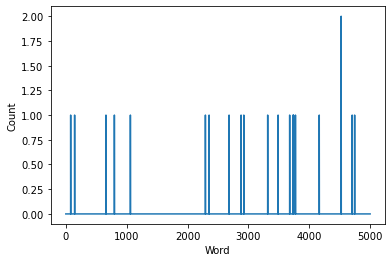

In [21]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

## Tokenizing and Padding

In [22]:


max_words = 5000
max_len=50

def tokenize_pad_sequences(text):

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_comment'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_comment'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 
After Tokenization & Padding 
 [ 254   10  122  641  870   39    9   94   23   53   53   21   42  289
 4163    9   10  128 3148    5    1    2 4415   10 1438   18    1  111
 1517    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [23]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Train &  Test

In [24]:
y = pd.get_dummies(df['category'])

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Extracting validation set from the train set
valid_size=1000
X_valid, y_valid = X_train[-valid_size:], y_train[-valid_size:]
X_test, y_test = X_train[:-valid_size], y_train[:-valid_size]

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_valid.shape, y_valid.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (26004, 50) (26004, 3)
Validation Set -> (1000, 50) (1000, 3)
Test Set -> (25004, 50) (25004, 3)


In [25]:
import keras.backend as K

def f1_score(precision , recall):
    f1_val  = 2*(precision*recall)/(precision+recall+k.epsilon())
    return f1_val

In [43]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall

vocab_size = 5000
embedding_size = 32

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

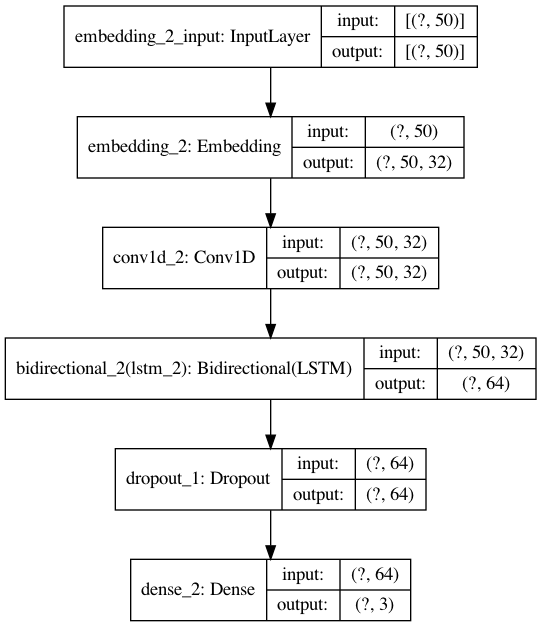

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [45]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy', Precision(), Recall()])

# Train model
num_epochs = 10
batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_valid, y_valid),
                      batch_size=batch_size, epochs=num_epochs, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
813/813 [==============================] - 18s 22ms/step - loss: 0.6415 - accuracy: 0.7260 - preci

## Accuracy plot

<Figure size 432x288 with 0 Axes>

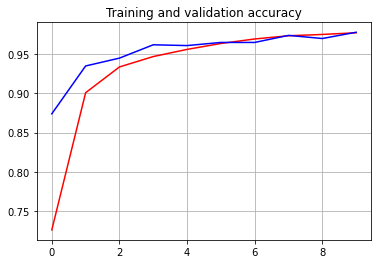

<Figure size 432x288 with 0 Axes>

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(history.epoch, acc, 'r', label='Training accuracy')
plt.plot(history.epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.figure()

## Loss plot

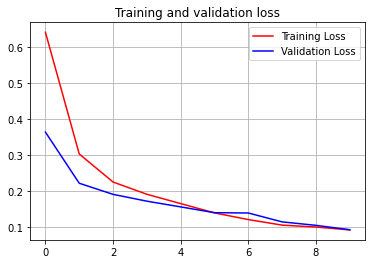

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.epoch, loss, 'r', label='Training Loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()


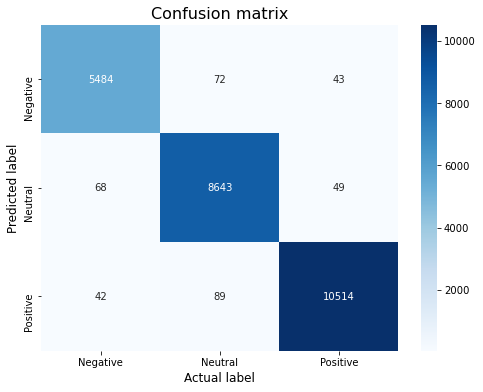

In [49]:
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [50]:
model.save('Reddit_comments_model_2.h5')


In [61]:
from keras.models import load_model

# Load model
model = load_model('Reddit_comments_model_2.h5')

def predict_class(Comment):
    
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    text = []
    text.append(Comment)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    #print('The predicted sentiment is', sentiment_classes[yt[0]])
    return sentiment_classes[yt[0]]

(0.0, 1.0)

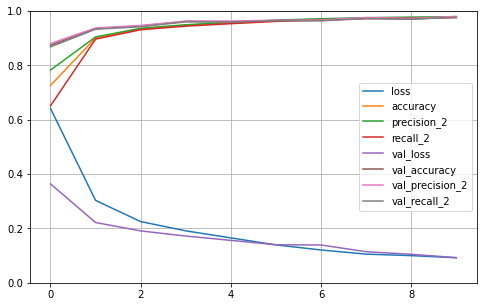

In [62]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


In [63]:
import gradio as gr

In [64]:
iface = gr.Interface(fn=predict_class, inputs="text", outputs="text")
iface.launch()

Running locally at: http://127.0.0.1:7864/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7864/', None)